<a href="https://colab.research.google.com/github/alegoritma/CSE-ImageProcessing-Project/blob/main/OpticDiscThresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ADAPTIVE THRESHOLDING
Example below shows the threshold we gave manually, and given by adaptive segmentation. It looks like the adaptive thresholding technique does not give the desired result here, it just separates the optical disc itself from background.


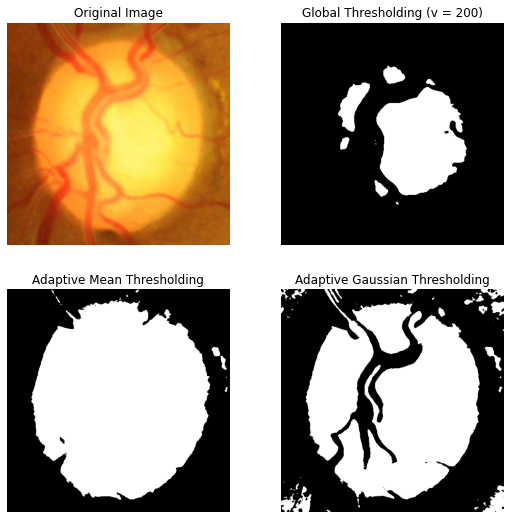

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('a.jpg',0)
img_org = cv.imread('a.jpg')
img = cv.medianBlur(img,5)
global_thresholding_level = 200
adaptive_param1 = 501
adaptive_param2 = 2
ret,th1 = cv.threshold(img, global_thresholding_level, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,adaptive_param1,adaptive_param2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,adaptive_param1,adaptive_param2)
titles = ['Original Image', f'Global Thresholding (v = {global_thresholding_level})',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_org, th1, th2, th3]
plt.figure(figsize=(9,9))
for i in range(4):
    plt.subplot(2,2,i+1)
    if i == 0:
      plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    else:
      plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()

## OTSU'S BINARIZATION

Here, too, we compare our own value with the OTSU's duplication technique. We get the same result without any parameter adjustment as we get in adaptive, but what we want is not only to separate optical disc from background, but also the optic cup from disc.

200.0
144.0


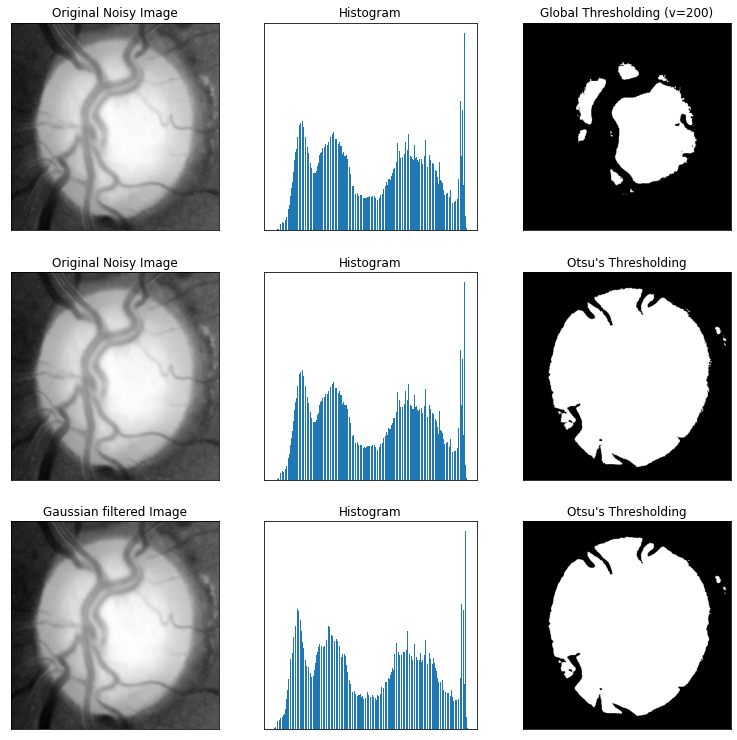

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('a.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,200,255,cv.THRESH_BINARY)
print(ret1)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret3)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=200)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(13,13))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## MULTI-OTSU

Here we apply the technique called multi-otsu. In the histogram used in binary otsu, we find the separating point and apply multiple cuts rather than just one cut. Segmented images are shown in the result.

Resource: Liao, P-S., Chen, T-S. and Chung, P-C., “A fast algorithm for multilevel thresholding”, Journal of Information Science and Engineering 17 (5): 713-727, 2001. Available at: <https://ftp.iis.sinica.edu.tw/JISE/2001/200109_01.pdf>.

[129 186]


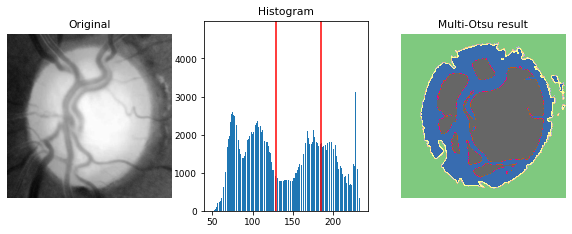

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = cv.imread('a.jpg',0)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

print(thresholds)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

Here below, we apply thresholding by taking only the maximum of the same histogram cut points and we separate the cup part from the disc part.

179


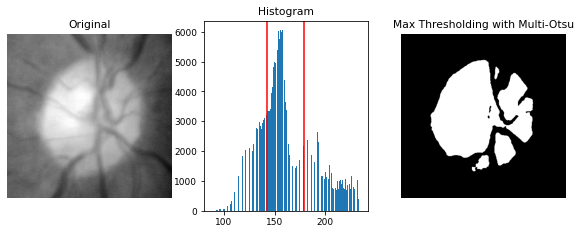

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_multiotsu

image = cv.imread('a.jpg',0)

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

selected_threshold = np.max(thresholds)

print(selected_threshold)

_, threshold_img = cv.threshold(img,selected_threshold,255,cv.THRESH_BINARY)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(threshold_img, 'gray')
ax[2].set_title('Max Thresholding with Multi-Otsu')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()